In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

import yfinance as yf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [19]:
ticker_symbol = 'AAPL'
data = yf.Ticker(ticker_symbol)

In [20]:
prices = data.history(start='2021-01-01', end='2021-12-31').Close

Text(0, 0.5, 'Share Price')

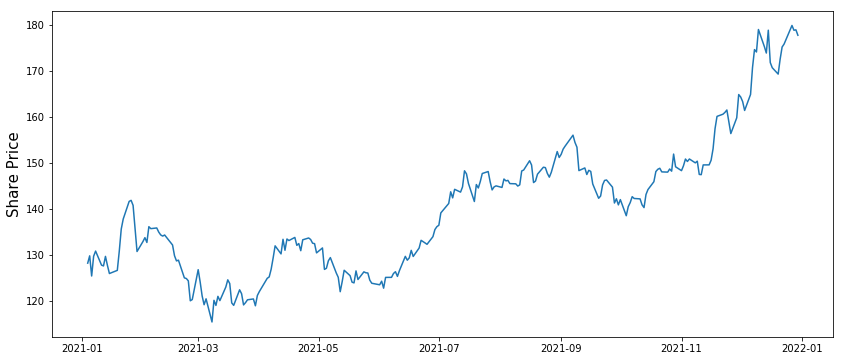

In [21]:
plt.figure(figsize=(14,6))
plt.plot(prices)
plt.ylabel('Share Price', fontsize=15)

## Clearly Prices are not stationary, cannnot fit time series model directly to price data

Text(0, 0.5, 'Daily Return on Apple Share')

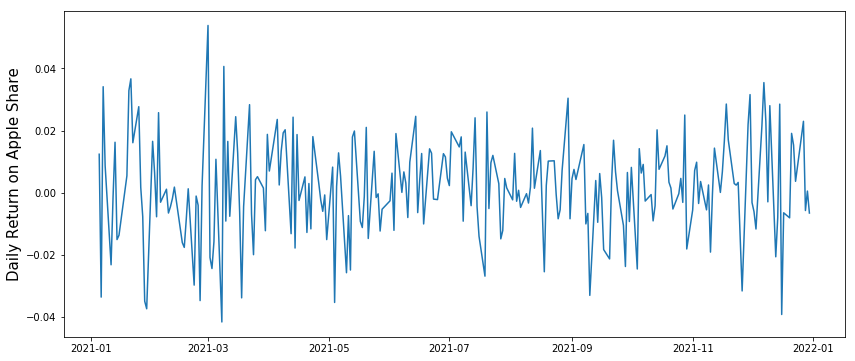

In [28]:
returns = prices.pct_change().dropna()
plt.figure(figsize=(14, 6))
plt.plot(returns)
plt.ylabel("Daily Return on Apple Share", fontsize=15)

### Looks like Stationary, 3 type of Stationary:- 

     1. Trend Stationary
     2. Seasonal Stationary
     3. Strictly Stationary : Joint Distribution of observations

### Augmented Dickey-fuller test (Unit root test)

### Null: Time series data is not stationary
### Alternate: it is stationary

In [31]:
# testing for stationary conditions

from statsmodels.tsa.stattools import adfuller
values = returns.values

res = adfuller(values)

if res[1] > 0.05:
    print("Apple returns are not stationary")
else:
    print("Apple returns are stationary")

In [32]:
res

(-16.287903547193242,
 3.3610702302288195e-29,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 -1287.114893097816)